# Elliptical harmonic oscillator with interacting gaussians

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tqdm

from vmc.interface import PyEllipticalHarmonicOscillator, \
    PyMetropolisAlgorithm, PyInteractingEllipticalGaussian, \
    PySampler, PyImportanceMetropolis
from vmc import run_experiment

from IPython.core.pylabtools import figsize
from IPython.core.display import display

In [2]:
sns.set(color_codes=True)

In [3]:
mass = 1.0
omega = 1.0
hbar = 1.0

radius = 0.043
beta = _lambda = 2.82843

num_particles = 5
num_dimensions = 3

step_length = 1.0
num_thermalization_steps = int(num_particles * 2000)
num_samples = int(1e6)

alpha_min = 0.2
alpha_max = 0.9
num_alphas = 29

parameter_names = ["alpha"]

alphas = np.linspace(alpha_min, alpha_max, num_alphas).reshape(num_alphas, 1)

kwargs = {
    "num_samples": num_samples, "step_length": step_length,
    "num_thermalization_steps": num_thermalization_steps}

In [4]:
wavefunction = PyInteractingEllipticalGaussian(
    num_particles, num_dimensions, mass, omega, beta, radius,
    spread=step_length)
solver = PyImportanceMetropolis()
hamiltonian = PyEllipticalHarmonicOscillator(_lambda)

sampler = PySampler(wavefunction, hamiltonian, solver)

In [5]:
wavefunction_brute = PyInteractingEllipticalGaussian(
    num_particles, num_dimensions, mass, omega, beta, radius,
    spread=step_length*0.1)
solver_brute = PyMetropolisAlgorithm()
hamiltonian_brute = PyEllipticalHarmonicOscillator(_lambda)
sampler_brute = PySampler(
    wavefunction_brute, hamiltonian_brute, solver_brute)

In [6]:
df = run_experiment(
    sampler, wavefunction, alphas, parameter_names, **kwargs)

100%|██████████| 29/29 [00:43<00:00,  1.52s/it]


In [7]:
df_brute = run_experiment(
    sampler_brute, wavefunction_brute, alphas, parameter_names, **kwargs)

100%|██████████| 29/29 [00:28<00:00,  1.01it/s]


In [8]:
display(df)

,alpha,energy,variance,acceptance
0,0.200,18.008419,27.708461,0.719022
1,0.225,16.650368,19.837213,0.673090
2,0.250,15.590244,14.135596,0.627532
3,0.275,14.802119,10.185339,0.583513
4,0.300,14.172572,7.107287,0.540063
5,0.325,13.700029,4.916861,0.498485
6,0.350,13.337261,3.237694,0.460321
7,0.375,13.092008,2.099708,0.424802
8,0.400,12.896019,1.243318,0.390264
9,0.425,12.757073,0.641170,0.359682


In [9]:
display(df_brute)

,alpha,energy,variance,acceptance
0,0.200,18.091164,28.201970,0.600260
1,0.225,16.652470,20.005278,0.580253
2,0.250,15.620669,14.334855,0.561162
3,0.275,14.794736,10.239385,0.541618
4,0.300,14.203260,7.213633,0.525519
5,0.325,13.713578,5.015843,0.509928
6,0.350,13.348194,3.310797,0.495309
7,0.375,13.098351,2.166155,0.481614
8,0.400,12.870265,1.206326,0.468024
9,0.425,12.754296,0.643985,0.454570


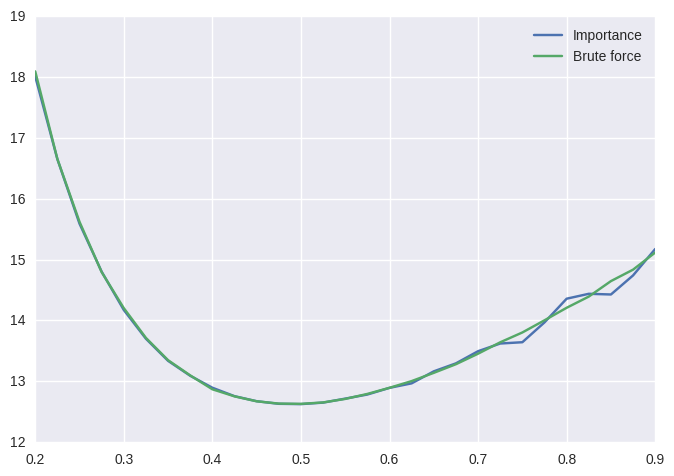

In [10]:
plt.plot(df["alpha"], df["energy"], label="Importance")
plt.plot(df_brute["alpha"], df_brute["energy"], label="Brute force")
plt.legend(loc="best")
plt.show()

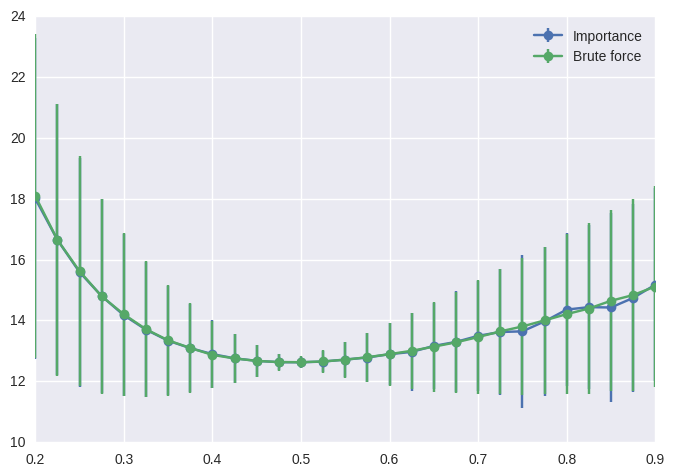

In [11]:
plt.errorbar(
    df["alpha"], df["energy"],
    yerr=np.sqrt(df["variance"]),
    label="Importance", fmt="o-")
plt.errorbar(
    df_brute["alpha"], df_brute["energy"],
    yerr=np.sqrt(df_brute["variance"]),
    label="Brute force", fmt="o-")
plt.legend(loc="best")
plt.show()

In [12]:
r_min = 0
r_max = 4
num_bins = 100

sampler.initialize_one_body_densities(r_min, r_max, num_bins)
wavefunction.set_parameters(np.array([0.5]))
wavefunction.redistribute()

In [13]:
sampler.sample(num_samples, step_length)

In [14]:
bins = sampler.get_one_body_densities()
radius = np.linspace(r_min, r_max, num_bins)

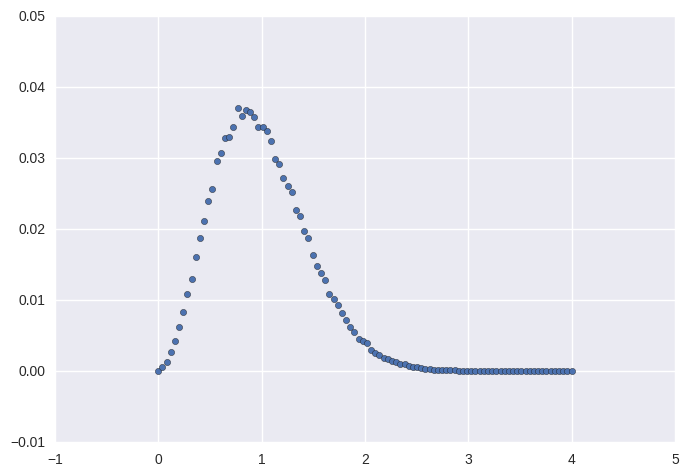

In [15]:
plt.scatter(radius, bins)
plt.show()